In [17]:
from scipy.special import comb, perm
from scipy.stats import hypergeom
from scipy.stats import binom
import numpy as np
import pandas as pd
import seaborn as sns;
import matplotlib.pyplot as plt

In [18]:
def raffle_winning(tickets_have, tickets_total = 1400,tickets_pick = 20):
    p = comb(tickets_total - tickets_have, tickets_pick) / comb(tickets_total, tickets_pick)
    return 1 - p

In [19]:
res=[]
n=100
for i in range(1, n):
    res.append([i, raffle_winning(i)])


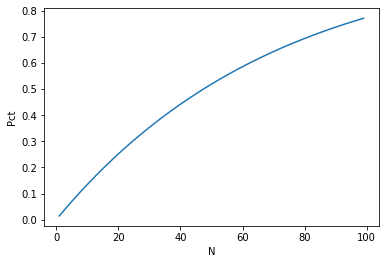

In [20]:
df = pd.DataFrame(res, columns = ['N','Pct'])
ax = sns.lineplot(x = 'N', y = 'Pct', data = df)
plt.savefig('pic1.png')

In [8]:
df['differential']=np.gradient(df.Pct)

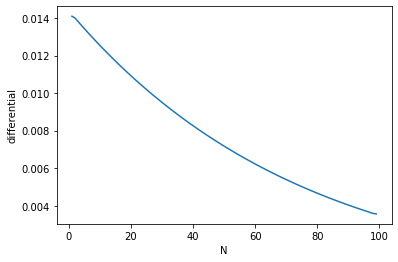

In [9]:
ax = sns.lineplot(x='N', y='differential', data=df)
plt.savefig('pic2.png')

In [10]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html
# http://www.milefoot.com/math/stat/pdfd-binomial.htm
# http://www.milefoot.com/math/stat/pdfd-hypergeometric.htm

[M, n, N] = [5, 4, 5]#N: Total instances, n: target instances, N: trail counts
p = n / M
rv_hg = hypergeom(M, n, N)
rv_bn = binom(N, p)

x = np.arange(0, N+1)

pmf_hg = rv_hg.pmf(x)

pmf_bn = rv_bn.pmf(x)

pd.DataFrame({'N':x,'pmf_bn':pmf_bn,'pmf_hg':pmf_hg})

,N,pmf_bn,pmf_hg
0,0,0.00032,0.0
1,1,0.00640,0.0
2,2,0.05120,0.0
3,3,0.20480,0.0
4,4,0.40960,1.0
5,5,0.32768,0.0


In [11]:
def build_rvs(M = 700,n = 50,N = 20):
    p = n / M
    rv_hg = hypergeom(M, n, N)
    rv_bn = binom(N, p)

    return (rv_hg, rv_bn)

In [12]:
def build_res_dfs(M = 700,n = 700,N = 20):
    res = []
    for i in range(1, n + 1):
        
        rv_hg, rv_bn = build_rvs(M = M,n =  i,N = N)
        a = rv_hg.expect().round(4)
        b = rv_bn.expect().round(4)
        c = rv_hg.std().round(4)
        d = rv_bn.std().round(4)
        res.append((i,a,b,c,d))
    df = pd.DataFrame(res,columns=['N','hg_exp','bn_exp','hg_std','bn_std'])
    df_hg = df[['N','hg_exp','hg_std']].copy()
    df_hg['Type'] = 'hg'

    df_hg = df_hg.rename(columns = {'hg_exp':'exp','hg_std':'std'})

    df_bn = df[['N','bn_exp','bn_std']].copy()
    df_bn['Type'] = 'bn'
    df_bn = df_bn.rename(columns = {'bn_exp':'exp','bn_std':'std'})
    merge_df = pd.concat([df_hg, df_bn])
    return merge_df

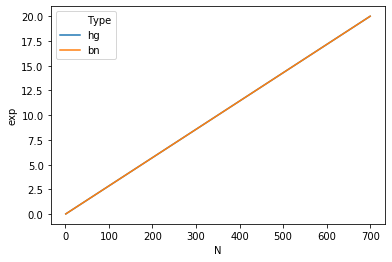

In [15]:
merge_df=build_res_dfs(n=700)
ax = sns.lineplot(x = 'N', y = 'exp', data = merge_df,hue = 'Type')
plt.savefig('exp_comp.png')

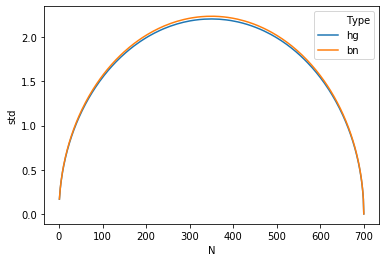

In [14]:

ax = sns.lineplot(x = 'N', y = 'std', data = merge_df, hue = 'Type')
plt.savefig('std_comp.png')

In [16]:
merge_df.loc[merge_df.Type=='hg','std']/merge_df.loc[merge_df.Type=='bn','std']

0      0.986382
1      0.986175
2      0.986306
3      0.986354
4      0.986458
         ...   
695    0.986354
696    0.986306
697    0.986175
698    0.986382
699         NaN
Name: std, Length: 700, dtype: float64

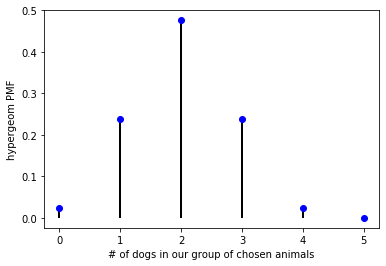

In [88]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(x, pmf_dogs, 'bo')
# ax.vlines(x, 0, pmf_dogs, lw=2)
# ax.set_xlabel('# of dogs in our group of chosen animals')
# ax.set_ylabel('hypergeom PMF')
# plt.show()